# Plan:

1. Get the polygon
2. Create nodes from the polygon
3. Create edges between nodes in the graph
4. Assign edge costs
5. Create the A* search algorithm
6. Perform the A* search algorithm on the sample graph
7. Get the result in the form of path
8. (Optional) Visualize the result and the graph

# Questions:
- How many nodes to use vertically and horizontally?
- How to assign edges for the nodes in the graph?
- How to assign edge costs?

In [41]:
from matplotlib.patches import Rectangle
from shapely.geometry import Point, Polygon

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

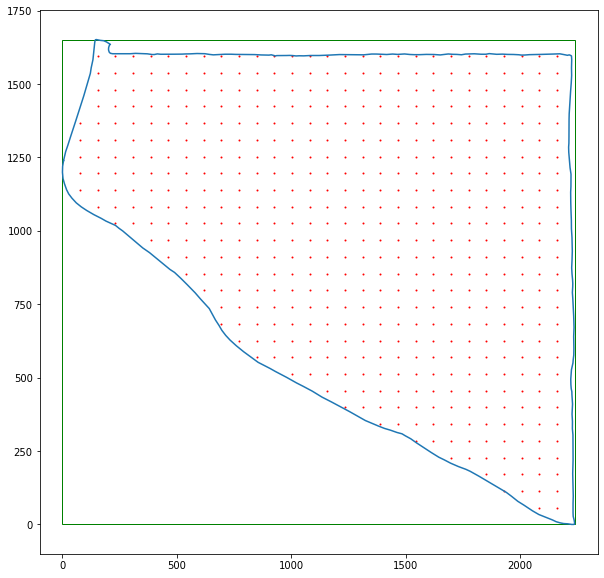

In [62]:
shp_file = gpd.read_file("Data/polygons.shp")
index = 9
point_num = 30
polygon = Polygon(shp_file["geometry"][index])

min_x = shp_file.geometry[index].bounds[0]
min_y = shp_file.geometry[index].bounds[1]
width = shp_file.geometry[index].bounds[2] - shp_file.geometry[index].bounds[0]
height = shp_file.geometry[index].bounds[3] - shp_file.geometry[index].bounds[1]

fig, ax = plt.subplots(figsize=(10, 10))
ax.add_patch(Rectangle((0, 0), width, height, fc='None', ec='g', lw=1))

x = np.linspace(min_x, min_x + width, point_num)
y = np.linspace(min_y, min_y + height, point_num)
coords = [[], []]

for i in x:
    for j in y:
        point = Point(i, j)
        if polygon.contains(point):
            coords[0].append(i - min_x)
            coords[1].append(j - min_y)

plt.xlim([-100, width + 100])
plt.ylim([-100, height + 100])

plt.plot(shp_file.geometry[index].boundary.coords.xy[0] - np.array(min_x),
         shp_file.geometry[index].boundary.coords.xy[1] - np.array(min_y))

plt.scatter(coords[0], coords[1], s=1, c='r')

plt.show()